# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [86]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values


### Feature Scaling

In [106]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)


[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [88]:
X_train = []
y_train = []
for i in range(80, 1258):
    X_train.append(training_set_scaled[i-80:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1178, 80)
(1178,)


### Reshaping

In [89]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(1178, 80, 1)


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [91]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [92]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [93]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [94]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [95]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fifth LSTM layer and some Dropout regularisation

In [96]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a sixth LSTM layer and some Dropout regularisation

In [97]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a seventh LSTM layer and some Dropout regularisation

In [98]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [99]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [100]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [101]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 10s 259ms/step - loss: 0.0454
Epoch 2/100
37/37 [==============================] - 9s 244ms/step - loss: 0.0082
Epoch 3/100
37/37 [==============================] - 9s 247ms/step - loss: 0.0090
Epoch 4/100
37/37 [==============================] - 9s 243ms/step - loss: 0.0071
Epoch 5/100
37/37 [==============================] - 9s 243ms/step - loss: 0.0075
Epoch 6/100
37/37 [==============================] - 9s 245ms/step - loss: 0.0066
Epoch 7/100
37/37 [==============================] - 9s 244ms/step - loss: 0.0068
Epoch 8/100
37/37 [==============================] - 9s 245ms/step - loss: 0.0057
Epoch 9/100
37/37 [==============================] - 9s 244ms/step - loss: 0.0071
Epoch 10/100
37/37 [==============================] - 9s 253ms/step - loss: 0.0058
Epoch 11/100
37/37 [==============================] - 9s 247ms/step - loss: 0.0061
Epoch 12/100
37/37 [==============================] - 9s 246ms/step - loss: 0.0055
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [102]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [103]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 80:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(80, 100):
    X_test.append(inputs[i-80:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

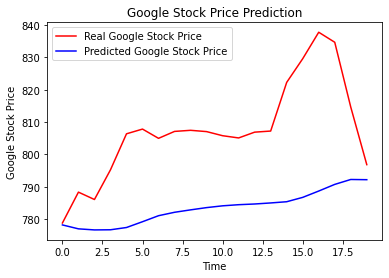

In [104]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()